In [1]:
import sys, os
path_set = False
if path_set is False:
    sys.path.append('../')
    os.chdir('../')
    path_set = True

import numpy as np
import matplotlib.pyplot as plt
from datasets import data_loader as dl

## What is the appropriate resolution?

In [2]:
dataset_codes = ['rel', 'inf', 'qdr', 'skt', 'test']
datasets = []
for code in dataset_codes:
    datasets.append(dl.load_data(code))
    
dataset_maping = dict(zip(dataset_codes, datasets))

In [3]:
def resolution_collect(code):
    res_ls = []
    dataset = dataset_maping[code]
    sampling_rate = int(len(dataset) / 10.0)
    subsampling = np.random.permutation(len(dataset))[:sampling_rate]
    for idx in subsampling:
        img_tensor, label = dataset.__getitem__(idx)
        shape = (img_tensor.size()[1], img_tensor.size()[2])
        res_ls.append(shape)
    return res_ls

In [4]:
rel_res_ls = resolution_collect('rel')
test_res_ls = resolution_collect('test')
inf_res_ls = resolution_collect('inf')
qdr_res_ls = resolution_collect('qdr')
skt_res_ls = resolution_collect('skt')

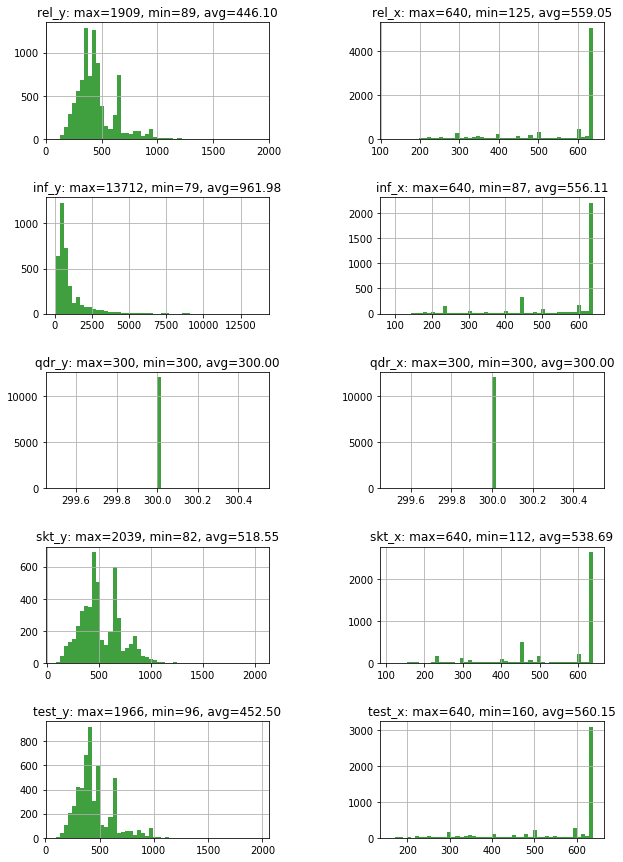

In [5]:
all_res_ls = {'rel': rel_res_ls, 'inf': inf_res_ls, 'qdr': qdr_res_ls, 'skt': skt_res_ls, 'test': test_res_ls}

fig, axs = plt.subplots(5,2, figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)
axs = axs.ravel()

cnt = 0
for code in dataset_codes:
    res_ls = all_res_ls[code]
    res_ls_y, res_ls_x = list(zip(*res_ls))
    
    axs[cnt].hist(res_ls_y, 50, facecolor='g', alpha=0.75)
    axs[cnt].grid(True)
    axs[cnt].set_title("{}_y: max={}, min={}, avg={:.2f}".format(code, max(res_ls_y), min(res_ls_y), sum(res_ls_y)/float(len(res_ls_y))))
    cnt += 1
    
    axs[cnt].hist(res_ls_x, 50, facecolor='g', alpha=0.75)
    axs[cnt].grid(True)
    axs[cnt].set_title("{}_x: max={}, min={}, avg={:.2f}".format(code, max(res_ls_x), min(res_ls_x), sum(res_ls_x)/float(len(res_ls_x))))
    cnt += 1

## We may choose resolution = 512x512
Then we plot some resized examples

In [6]:
import warnings
warnings.filterwarnings('ignore')
resized_datasets = []
for code in dataset_codes:
    resized_datasets.append(dl.load_data(code, resize = (512,512)))
    
resized_dataset_maping = dict(zip(dataset_codes, resized_datasets))

In [ ]:
fig, axs = plt.subplots(5,10, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.1)
axs = axs.ravel()
cnt = 0
for code in dataset_codes:
    ds = resized_dataset_maping[code]
    # randomly choose 10 images
    sampling = np.random.permutation(len(ds))[:10]
    axs[cnt].set_title(code)
    for idx in sampling:
        img_tensor, label = ds.__getitem__(idx)
        axs[cnt].imshow(img_tensor.permute(1, 2, 0))
        cnt += 1
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i